# SIMOC - Single Room Model

## Introduction to Modeling a Completely Self-Sufficient Colony

SIMOC (see-mock), or A Scalable Model of an Isolated Human Colony, is a proposed mathematical model of an isolated human colony. The goal of this model is to help understand how an off-world colony would handle the task of dynamically producing and allocating essential resources such as air, water, power, and food. As well as monitoring these vital resources, SIMOC will also consider the health and well-being those in the colony and rely on their expertise for accomplishing different tasks. 

## Simplifying the Model

Modeling a completely self-sufficient human colony such as this will ultimately draw from a number closed ecological studies as well as the expertise of various disciplines such as biology, health science, sociology, and sustainability. However, this complex model can be simplified to help understand how this system operates on a basic level. 

In this python notebook, a simple model of a plant and a person will be created to help understand the transfer of oxygen, carbon dioxide, and water through the air. This simple model will make a couple of assumptions which dictate the values used in these calculations:

* The plant being used in this model is wheat

* The person in this model is assumed to weigh 82 kg, the median male mass

* The room in which this model takes place is 10 meters x 10 meters x 10 meters

* The gas is treated as an ideal gas


To begin, classes will be created to define a colony of people (in this case one person) and a given area of wheat.


## Human Colony Class

The first class that will be created will be a Human Colony class. In this class, a person (or people) with different traits characteristic of this colony. These being breathing, perspiring, and being removed from the room if the carbon dioxide in the room is too high or the oxygen in the room is too low. The values used in these calculations are based on the Baseline Values and Assumptions Document provided by NASA.

In [37]:
class HumanColony(object):
    def __init__(self,number=0):
        self.number = number
        self.oxygen = 0
        self.carbon = 0
        self.water = 0
    def breath(self,o2,co2,timeScale=1):
        # Assumption that the carbon dioxide and oxygen are ideal gases
        # P = nRT/V, R = kPa * m^3 * mol^-1 * K^-1
        # Exhaled and Inhaled values in kg/CM-d --- CM-d = Crewmember days
        self.oxygen=o2-(self.number)*(0.818/0.032)*(timeScale)*(8.28*10**-3)*(296)/(1000)
        self.carbon=co2+(self.number)*(1.037/0.044)*(timeScale)*(8.28*10**-3)*(296)/(1000)
        return self.oxygen, self.carbon # return carbon and oxygen kPa per day
    def removePeople(self,remove=1):
        if (self.number-remove>0):
            self.number-=remove
        else:
            self.number=0
    def perspire(self,h2o,timeScale=1):
        self.water = h2o+(1.585/0.032)*(timeScale)*(8.28*10**-3)*(296)/(1000)
        return self.water

## Plant Colony Class

Similarly to the Human Colony class, a Plant Colony class will also be defined to create a Plant Colony object in the simple model. The Plant Colony objects created in this class will have methods that control breating, water uptake, and the addition and removal of crops. These methods handle the total amounts of free oxygen, carbon dioxide, and water vapor in the air. All the values are based on the characteristic of wheat detailed in the Baseline Values and Assumptions Document.

In [38]:
class PlantColony(object):
    def __init__(self, area=0,maxArea=0):
        # Area in m^2
        self.area = area
        
        # Gas in units of kPa
        self.oxygen = 0
        self.carbon = 0
        self.water = 0
    def breath(self,o2,co2,timeScale=1):
        # Values based on wheat in kg/m^2*d
        # Assumption that the carbon dioxide and oxygen are ideal gases
        self.carbon=co2-(self.area)*(77/44)*(timeScale)*(8.28*10**-3)*(296)/(1000)
        self.oxygen=o2+(self.area)*(56/32)*(timeScale)*(8.28*10**-3)*(296)/(1000)
        return self.oxygen,self.carbon
    def waterUptake(self,h2o,timeScale=1):
        self.water = h2o+(self.area)*(11.79)*(timeScale)
        return self.water
    def addCrops(self,size):
        if (self.area+size < maxArea):
            self.area += size
        else:
            self.area = maxArea
    def removeCrops(self,size):
        if (self.area-size>0):
            self.area -= size
        else:
            self.area = 0

Now that the classes are defined, Human Colony and Plant Colony objects can be created and added to the room. For simplicity, the Human Colony will start with one person and Plant Colony will start with 1 m<sup>2</sup> of crops with a maximum plantable area of 100 m<sup>2</sup>.

In [39]:
person = HumanColony(1)
plant = PlantColony(1,100)

Next, some starting values will be defined to create the environment. In this case, the room created will have an oxygen content of *21.21 kPa* and a carbon dioxide content of *0.13 kPa* and a total pressure of *101 kPa*. These values were considered to be nominal in the Baseline Values and Assumptions Document. Empty lists are also created to store the total oxygen and carbon dioxide values after each time step to be used for graphing later.

In [40]:
oxygen = 21.21 # kPa
carbon = 0.13 # kPa
totOxy = []
totCarbon = []

Now, these values are fed in the functions in the loop to watch the air content change hourly and have the person and plant objects respond accordingly in a simple way.

In [41]:
for i in range(2400):
    oxygen, carbon = person.breath(oxygen,carbon,0.041666)
    oxygen, carbon = plant.breath(oxygen,carbon,0.041666)
    if (carbon>0.53 or oxygen<15.17):
        person.removePeople()
    if (carbon<0.015):
        plant.removeCrops(10)
    totOxy.append(oxygen)
    totCarbon.append(carbon)

Import Matplotlib to help plot these values. Finally, plot these values on one graph.

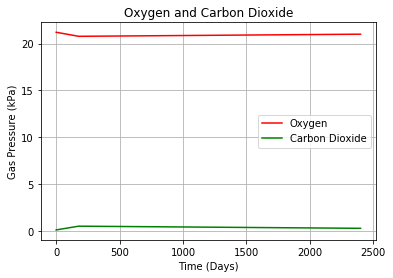

In [44]:
import matplotlib.pyplot as plt

plt.plot(range(2400),totOxy, 'r', label="Oxygen")
plt.plot(range(2400),totCarbon, 'g', label="Carbon Dioxide")
plt.xlabel('Time (Days)')
plt.ylabel('Gas Pressure (kPa)')
plt.title('Oxygen and Carbon Dioxide')
plt.grid(True)
plt.legend(loc='best')

plt.show()